In [1]:
# Dependencies
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

In [2]:
# import CSV

df = pd.read_csv('../cleaned_data/cleaned_disorder.csv')
df.head()

,Unnamed: 0,Sex,Race,Age,Number of Bio. Parents,Number of Siblings,Poverty Status,Social Phobia,ADHD,CD,...,Number of Type A Stressors,Number of Type B Stressors,Frequency Temper Tantrums,Frequency Irritable Mood,Number of Sleep Disturbances,Number of Physical Symptoms,Number of Sensory Sensitivities,Family History - Substance Abuse,Family History - Psychiatric Diagnosis,disorder
0,0,1,0,2,1,1,0,1,0,0,...,1,1,27,396,4,3,2,0,0,GAD
1,1,0,1,2,0,3,1,0,1,0,...,3,2,282,1179,6,1,0,1,1,None
2,2,1,1,3,2,1,0,0,0,0,...,1,0,3,0,9,4,1,0,0,SAD
3,3,1,0,4,2,0,0,0,0,0,...,2,0,30,45,6,0,0,0,1,None
4,4,1,0,5,2,3,0,1,0,1,...,3,8,637,1170,10,5,2,0,0,Both


In [3]:
# dropping index
df = df.drop(['Unnamed: 0'], axis=1)
df.head()

,Sex,Race,Age,Number of Bio. Parents,Number of Siblings,Poverty Status,Social Phobia,ADHD,CD,Depression,...,Number of Type A Stressors,Number of Type B Stressors,Frequency Temper Tantrums,Frequency Irritable Mood,Number of Sleep Disturbances,Number of Physical Symptoms,Number of Sensory Sensitivities,Family History - Substance Abuse,Family History - Psychiatric Diagnosis,disorder
0,1,0,2,1,1,0,1,0,0,1,...,1,1,27,396,4,3,2,0,0,GAD
1,0,1,2,0,3,1,0,1,0,0,...,3,2,282,1179,6,1,0,1,1,None
2,1,1,3,2,1,0,0,0,0,0,...,1,0,3,0,9,4,1,0,0,SAD
3,1,0,4,2,0,0,0,0,0,0,...,2,0,30,45,6,0,0,0,1,None
4,1,0,5,2,3,0,1,0,1,1,...,3,8,637,1170,10,5,2,0,0,Both


In [4]:
# split into inputs and outputs
outcomes = df['disorder']
outcomes.head()

input_factors = df.drop(['disorder'], axis = 1)
input_factors.head()

,Sex,Race,Age,Number of Bio. Parents,Number of Siblings,Poverty Status,Social Phobia,ADHD,CD,Depression,...,Number of Impairments,Number of Type A Stressors,Number of Type B Stressors,Frequency Temper Tantrums,Frequency Irritable Mood,Number of Sleep Disturbances,Number of Physical Symptoms,Number of Sensory Sensitivities,Family History - Substance Abuse,Family History - Psychiatric Diagnosis
0,1,0,2,1,1,0,1,0,0,1,...,4,1,1,27,396,4,3,2,0,0
1,0,1,2,0,3,1,0,1,0,0,...,5,3,2,282,1179,6,1,0,1,1
2,1,1,3,2,1,0,0,0,0,0,...,0,1,0,3,0,9,4,1,0,0
3,1,0,4,2,0,0,0,0,0,0,...,0,2,0,30,45,6,0,0,0,1
4,1,0,5,2,3,0,1,0,1,1,...,7,3,8,637,1170,10,5,2,0,0


In [8]:
# Train/test Split
input_train, input_test, output_train, output_test = train_test_split(input_factors, outcomes, random_state=42, 
                                                                      stratify=outcomes)

In [10]:
 from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

input_scaler = StandardScaler().fit(input_train.values.reshape(-1, 1))

C:\Users\kelle\anaconda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [11]:
 # Transform the training and testing data using the X_scaler and y_scaler models

input_train_scaled = input_scaler.transform(input_train)
input_test_scaled = input_scaler.transform(input_test)

C:\Users\kelle\anaconda\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\kelle\anaconda\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


k: 1, Train/Test Score: 1.000/0.569
k: 3, Train/Test Score: 0.791/0.653
k: 5, Train/Test Score: 0.767/0.694
k: 7, Train/Test Score: 0.772/0.708
k: 9, Train/Test Score: 0.767/0.736
k: 11, Train/Test Score: 0.758/0.750
k: 13, Train/Test Score: 0.758/0.750
k: 15, Train/Test Score: 0.758/0.750
k: 17, Train/Test Score: 0.758/0.750
k: 19, Train/Test Score: 0.758/0.750


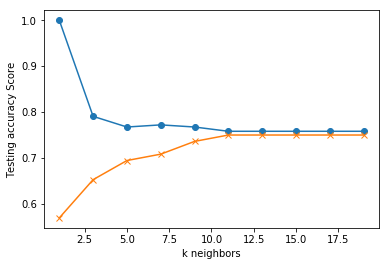

In [12]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(input_train_scaled, output_train)
    train_score = knn.score(input_train_scaled, output_train)
    test_score = knn.score(input_test_scaled, output_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [27]:
 # Note that k: 11 provides the best accuracy where the classifier starts to stablize
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(input_train, output_train)
print('k=11 Test Acc: %.3f' % knn.score(input_test, output_test))

k=11 Test Acc: 0.750
